In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from candlesticks import barplot

In [3]:
nq = pd.read_pickle('data/minute_NQ_cont_non_active_included.pickle')
nq.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-12-01 07:26:00,4818.0,4818.0,4818.0,4818.0,5,4818.0,4
2016-12-01 07:27:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:28:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:29:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:30:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0


In [4]:
nq.describe()

,open,high,low,close,volume,average,barCount
count,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000
mean,6716.392425,6717.406032,6715.376979,6716.394245,265.924575,6716.392849,139.156117
std,747.486336,747.792122,747.182925,747.487357,523.838464,747.487589,266.590693
min,4818.000000,4818.000000,4818.000000,4818.000000,0.000000,4818.000000,0.000000
25%,6058.250000,6059.000000,6057.250000,6058.250000,16.000000,6058.175000,11.000000
50%,6823.500000,6824.750000,6822.250000,6823.500000,59.000000,6823.425000,37.000000
75%,7364.250000,7365.250000,7363.000000,7364.250000,254.000000,7364.225000,134.000000
max,8044.500000,8051.750000,8042.250000,8044.750000,17549.000000,8045.125000,6643.000000


In [5]:
nq.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-12-01 07:26:00,4818.0,4818.0,4818.0,4818.0,5,4818.0,4
2016-12-01 07:27:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:28:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:29:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:30:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0


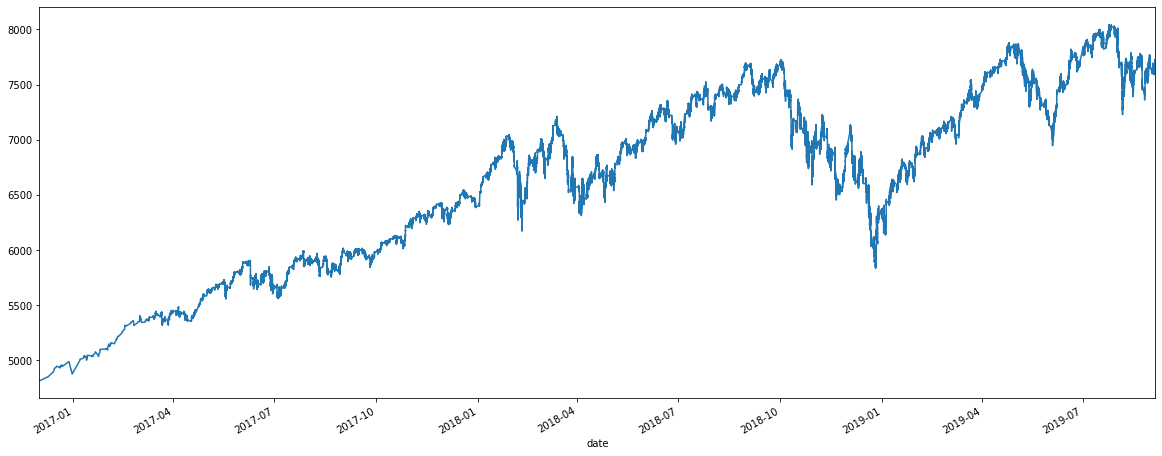

In [6]:
nq.close.plot(figsize=(20,8));

In [7]:
data = pd.DataFrame(nq.close)
data['max'] = data.close.rolling(200).max()
data['min'] = data.close.rolling(200).min()
data['ema'] = data.close.rolling(2000).mean()
#data['mean'] = (data['max'] + data['min']) / 2
#data['indicator'] = (data['close'] - data['mean']) / (data['max'] - data['min'])

data.tail()

,close,max,min,ema
date,,,,
2019-09-04 18:27:00,7695.00,7703.75,7668.25,7652.563250
2019-09-04 18:28:00,7695.00,7703.75,7668.25,7652.593375
2019-09-04 18:29:00,7695.00,7703.75,7668.25,7652.623375
2019-09-04 18:30:00,7697.50,7703.75,7668.25,7652.654500
2019-09-04 18:31:00,7697.25,7703.75,7668.25,7652.685250


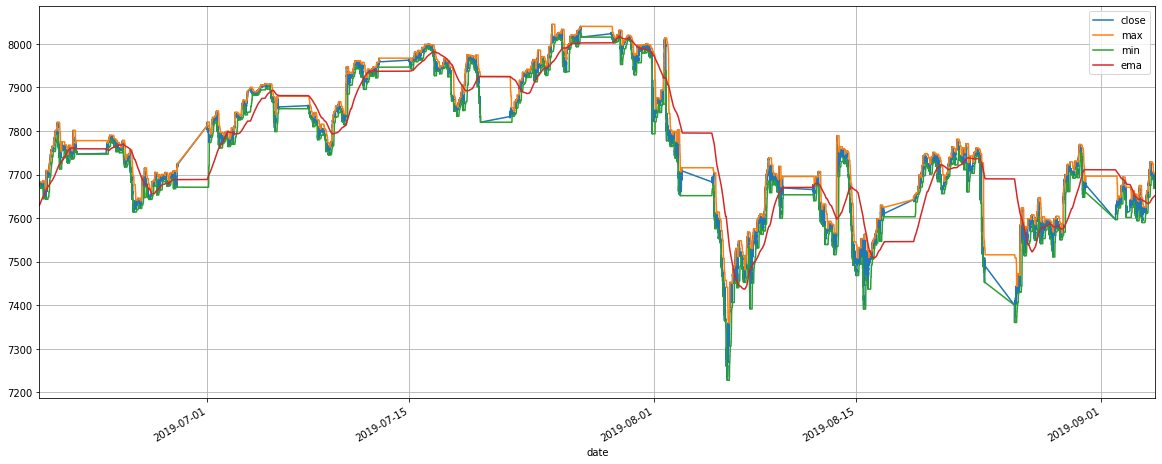

In [8]:
data[-75000:].plot(figsize=(20,8), grid=True);

In [9]:
avg_vol = nq.loc['20190621':].volume.rolling(30).sum().mean()
avg_vol

9916.21218117854

9916.21218117854


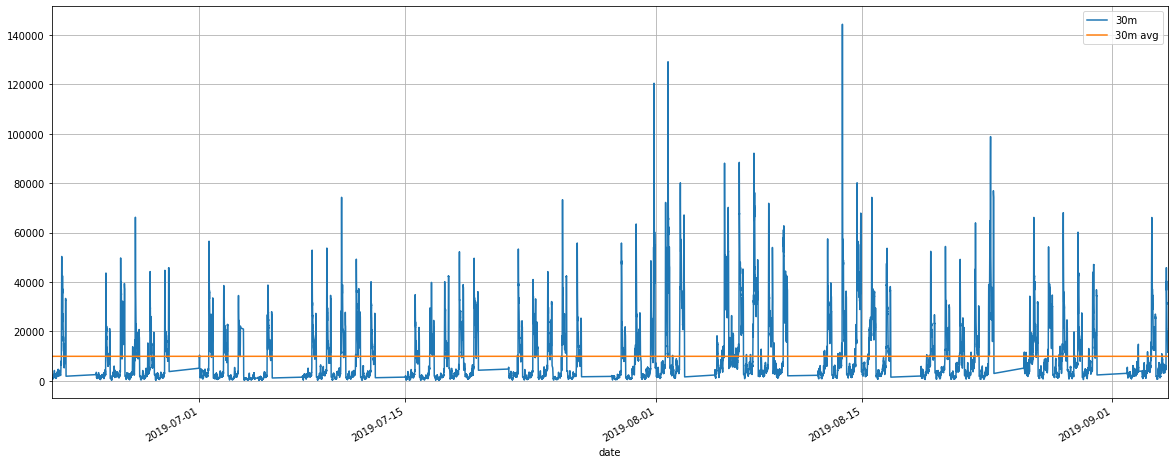

In [10]:
time_int = 30
df = nq.loc['20190621':]
avg = df.volume.rolling(time_int).sum().mean()
volume_df = pd.DataFrame({
    '{}m'.format(time_int): df.volume.rolling(time_int).sum(),
    '{}m avg'.format(time_int): avg,
})
print(avg)
volume_df.plot(figsize=(20, 8), grid=True);

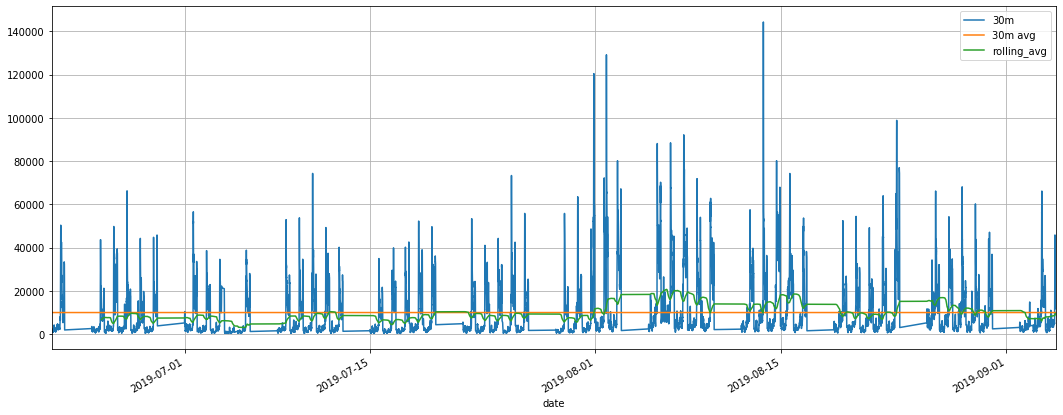

In [11]:
volume_df['rolling_avg'] = volume_df.iloc[:,0].rolling(2400).mean()
volume_df.plot(figsize=(18,7), grid=True);

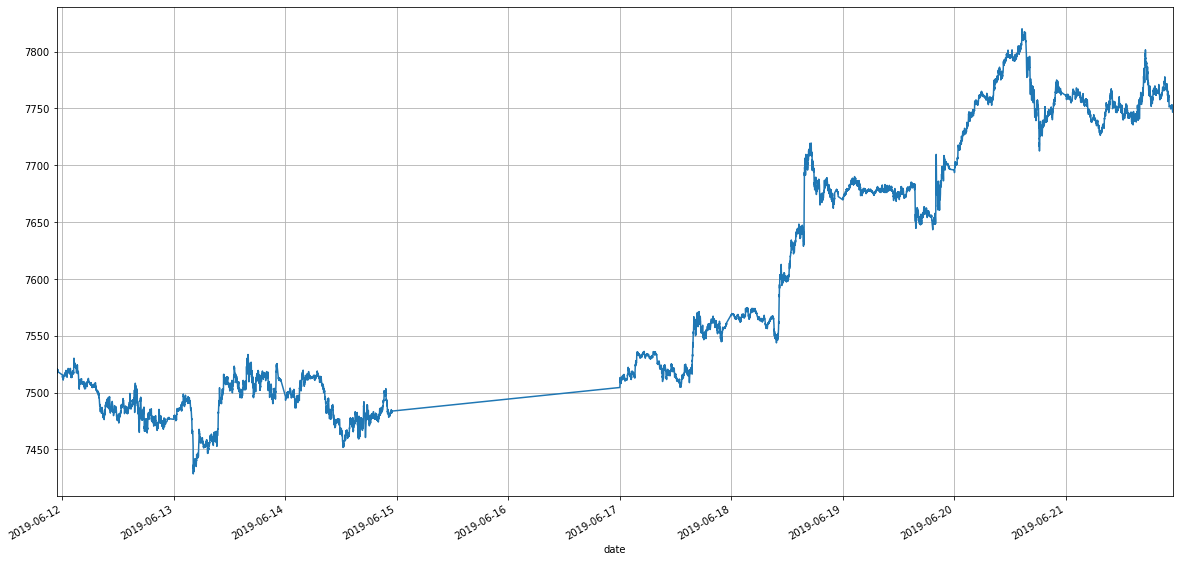

In [12]:
 nq.loc['20190611 22:45:00':'20190621'].close.plot(figsize=(20,10),grid=True);

In [13]:
class VolumeGrouper:
    def __init__(self, avg_vol):
        self.volume = 0
        self.counter = 0
        self.avg_vol = avg_vol
    def group(self, vol):
        self.volume += vol
        if self.volume >= self.avg_vol:
            self.volume -= self.avg_vol
            self.counter += 1
        return self.counter

In [14]:
vol_candles = nq.copy().reset_index()
vol_candles['turnover'] = vol_candles.close * vol_candles.volume
grouper = VolumeGrouper(avg_vol)
vol_candles['label'] = vol_candles.volume.apply(grouper.group)

In [15]:
vol_candles = vol_candles.groupby('label').agg({'date': 'last',
                                  'open': 'first',
                                 'high': 'max',
                                 'low': 'min',
                                 'close': 'last',
                                 'volume': 'sum',
                                'turnover': 'sum'})
vol_candles['avg_price'] = vol_candles.turnover / vol_candles.volume

In [16]:
#vol_candles.set_index('date', inplace=True)

In [17]:
vol_candles.head()

,date,open,high,low,close,volume,turnover,avg_price
label,,,,,,,,
0,2017-05-25 05:11:00,4818.00,5758.50,4818.00,5754.50,9916,55153560.25,5562.077476
1,2017-06-06 14:47:00,5756.00,5897.75,5746.75,5877.25,9911,57885386.00,5840.519221
2,2017-06-07 20:10:00,5877.50,5900.25,5853.50,5883.75,9909,58248350.00,5878.327783
3,2017-06-08 15:33:00,5883.00,5905.75,5876.75,5895.25,9448,55684814.50,5893.820332
4,2017-06-08 15:54:00,5895.25,5898.75,5868.25,5875.75,10166,59804729.75,5882.818193


In [18]:
vol_candles['close'] = vol_candles['avg_price']

In [19]:
data = pd.DataFrame(vol_candles.close)
data['max'] = data.close.rolling(20).max()
data['min'] = data.close.rolling(20).min()
data['ema_fast'] = data.close.ewm(span=80).mean()
data['ema_slow'] = data.close.ewm(span=480).mean()
#data.reset_index(drop=True, inplace=True)
data.tail()

,close,max,min,ema_fast,ema_slow
label,,,,,
23805,7683.603404,7720.918609,7669.95507,7658.967884,7635.689243
23806,7688.199032,7720.918609,7669.95507,7659.689640,7635.907578
23807,7699.411713,7720.918609,7669.95507,7660.670432,7636.171629
23808,7700.663738,7720.918609,7669.95507,7661.657921,7636.439787
23809,7694.604982,7714.980929,7669.95507,7662.471429,7636.681639


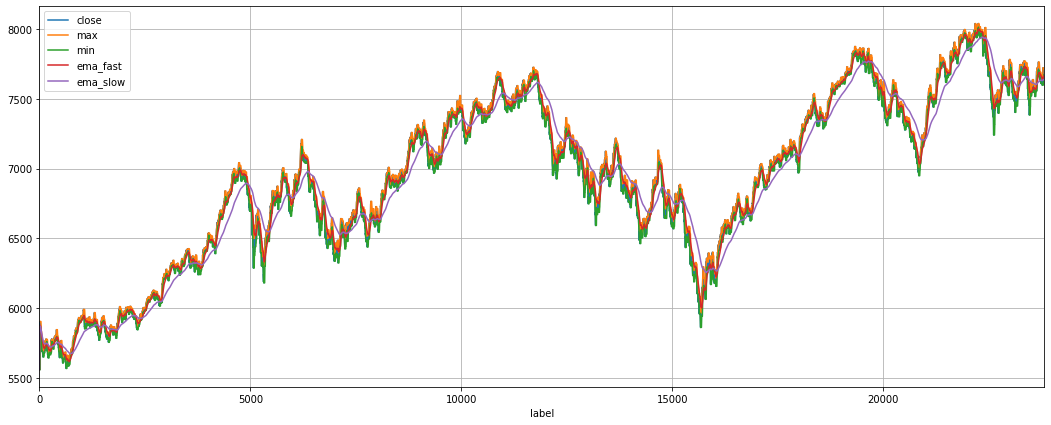

In [20]:
data.plot(figsize=(18,7), grid=True);

In [21]:
ema_diff = pd.DataFrame({'close': data['close'], 'ema_diff': data['ema_fast'] - data['ema_slow']})
ema_diff['return'] = ema_diff['close'].pct_change()
ema_diff['std'] = ema_diff['return'].expanding().std()
ema_diff['price_std'] = ema_diff['std'] * ema_diff['close']
ema_diff['norm'] = ema_diff['ema_diff']/ema_diff['price_std']
ema_diff['zscore'] = (ema_diff['ema_diff'] - ema_diff['ema_diff'].expanding().mean()) / ema_diff['ema_diff'].expanding().std()
#ema_diff['max']

In [22]:
ema_diff.tail()

,close,ema_diff,return,std,price_std,norm,zscore
label,,,,,,,
23805,7683.603404,23.278641,0.000550,0.001507,11.577686,2.010647,0.078451
23806,7688.199032,23.782062,0.000598,0.001507,11.584404,2.052938,0.083695
23807,7699.411713,24.498803,0.001458,0.001507,11.601279,2.111733,0.091161
23808,7700.663738,25.218134,0.000163,0.001507,11.602924,2.173429,0.098655
23809,7694.604982,25.789791,-0.000787,0.001507,11.593621,2.224481,0.104609


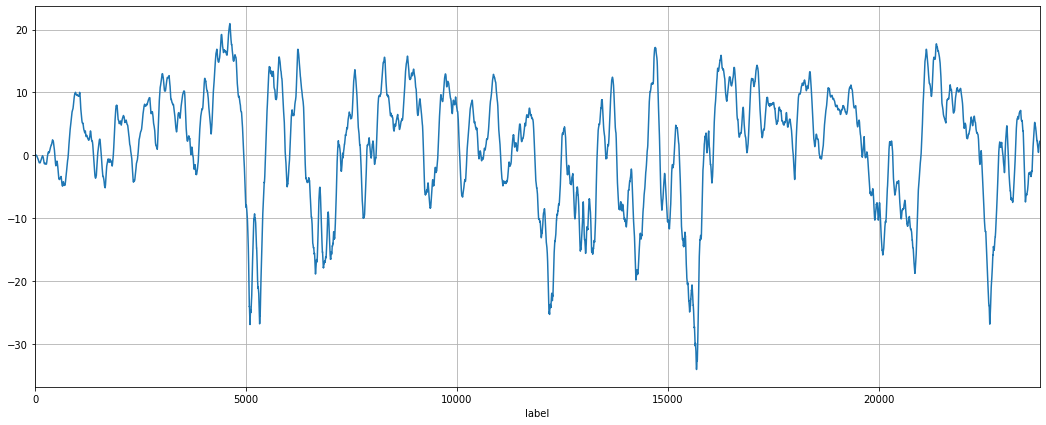

In [23]:
ema_diff['norm'].plot(figsize=(18,7), grid=True);

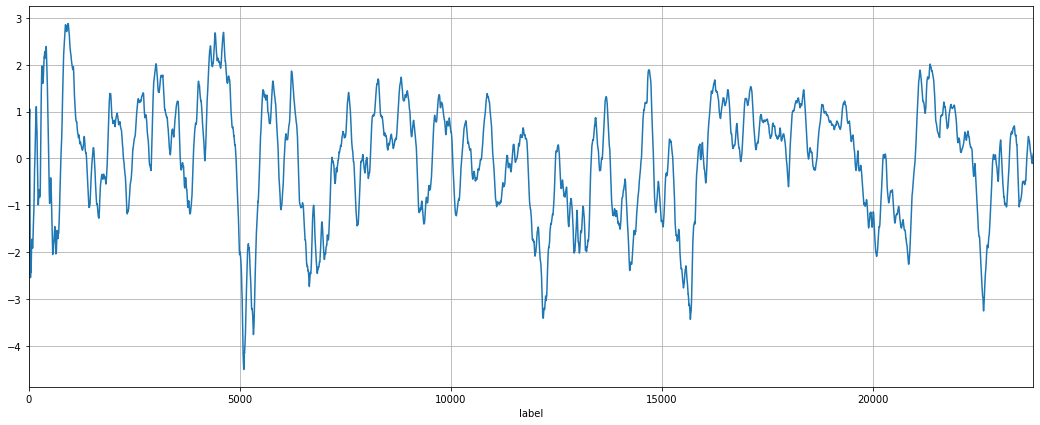

In [24]:
ema_diff['zscore'].plot(figsize=(18,7), grid=True);

In [25]:
def get_forecast(close, periods):
    ind = pd.DataFrame({'close': close})
    ind['max'] = ind.close.rolling(periods).max()
    ind['min'] = ind.close.rolling(periods).min()
    ind['mean'] = (ind['max'] + ind['min']) / 2
    ind['forecast'] = (ind['close'] - ind['mean']) / (ind['max'] - ind['min'])
    return ind

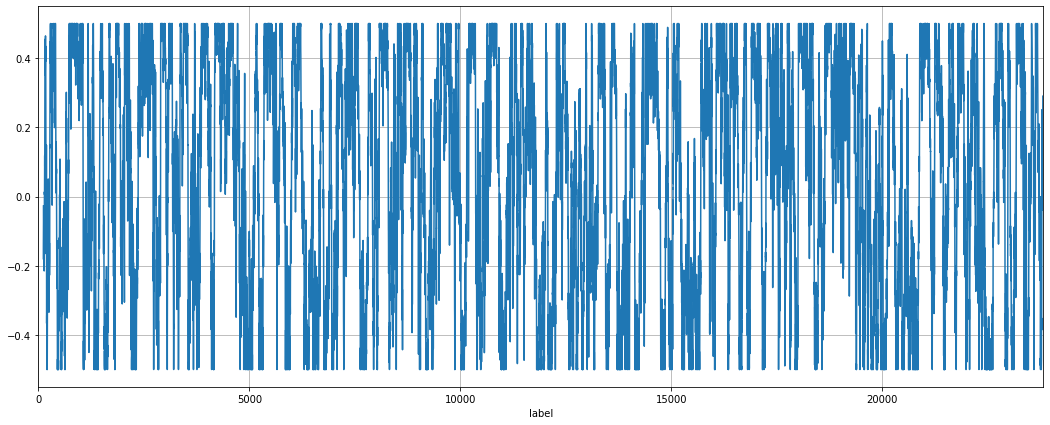

In [26]:
ind = get_forecast(data.close, 120)
ind.forecast.plot(figsize=(18,7), grid=True);

In [27]:
10 / ind.forecast.abs().mean()

33.06086150116104

In [28]:
10 / ema_diff.zscore.abs().mean()

10.156031498903031

In [29]:
10 / ema_diff.norm.abs().mean()

1.3101796554952012

In [30]:
ind['ind'] = ind['forecast'] * 40 + ema_diff['norm'] * 5.6

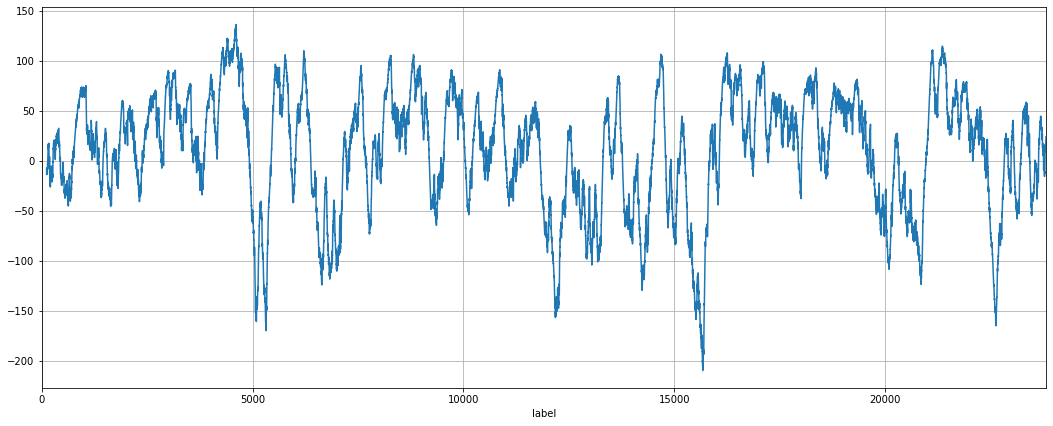

In [31]:
ind.ind.plot(figsize=(18, 7), grid=True);

In [32]:
norm_ind = pd.DataFrame({'breakout': ind['forecast'] * 40, 'ema_cross': ema_diff['norm'] * 5.6})
norm_ind['ema_cross'] = norm_ind['ema_cross'].clip(lower=-20, upper=20)
norm_ind['ema_cross_shift'] = norm_ind['ema_cross'].shift(20)
norm_ind.tail()

,breakout,ema_cross,ema_cross_shift
label,,,
23805,5.194789,11.259624,3.476122
23806,6.641898,11.496452,4.099397
23807,10.431595,11.825705,4.737875
23808,10.798456,12.171203,5.483204
23809,11.604084,12.457095,6.228474


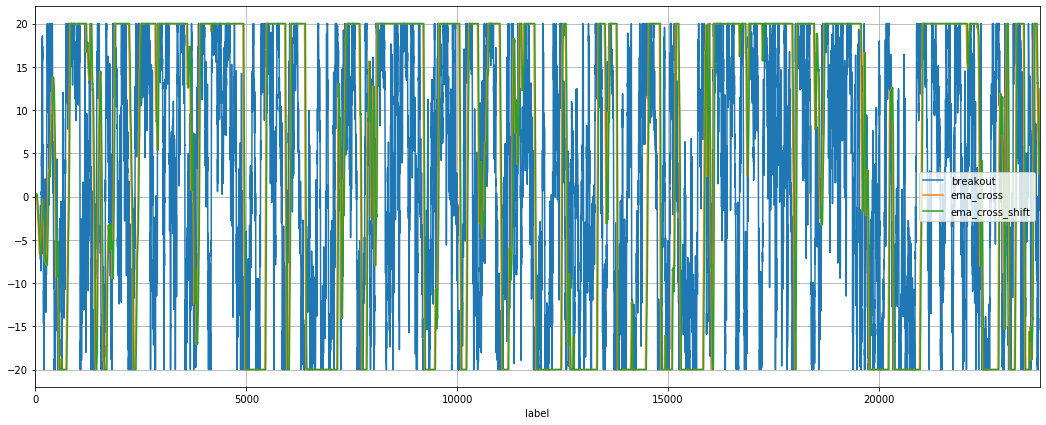

In [33]:
norm_ind.plot(figsize=(18,7), grid=True);

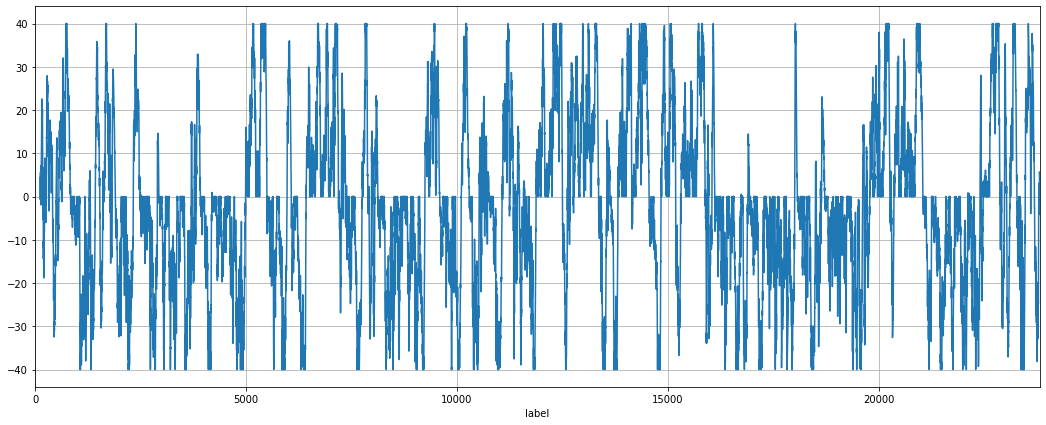

In [34]:
(norm_ind['breakout'] - norm_ind['ema_cross_shift']).plot(figsize=(18,7), grid=True);

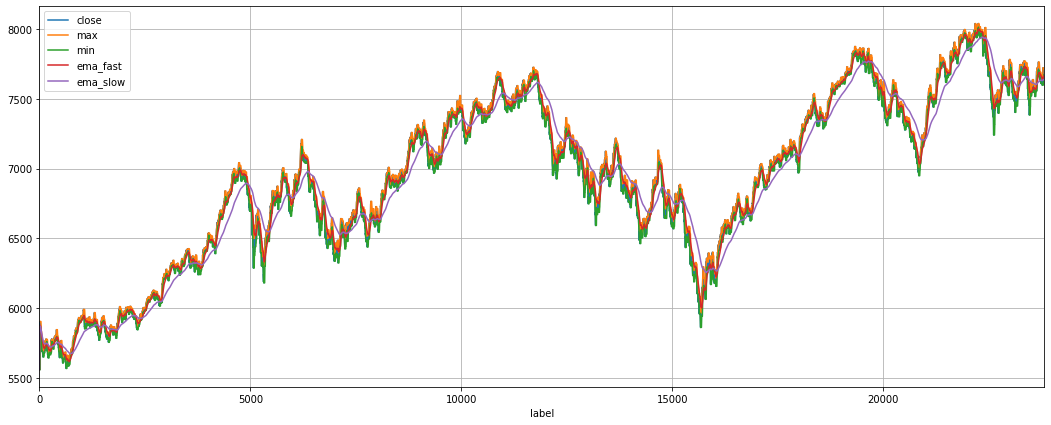

In [35]:
data.plot(figsize=(18,7), grid=True);

In [36]:
periods = [7, 15, 30, 120, 240, 480]

In [37]:
forecasts = pd.DataFrame()
for period in periods:
    forecasts[period] = get_forecast(data.close, period)['forecast']
forecasts.tail()

,7,15,30,120,240,480
label,,,,,,
23805,0.286673,-0.032210,0.190877,0.129870,0.180467,0.275807
23806,0.500000,0.161660,0.202716,0.166047,0.199092,0.287669
23807,0.500000,0.500000,0.297721,0.260790,0.244532,0.316608
23808,0.500000,0.500000,0.309497,0.269961,0.249606,0.319840
23809,0.216064,0.302702,0.252512,0.290102,0.225053,0.304202


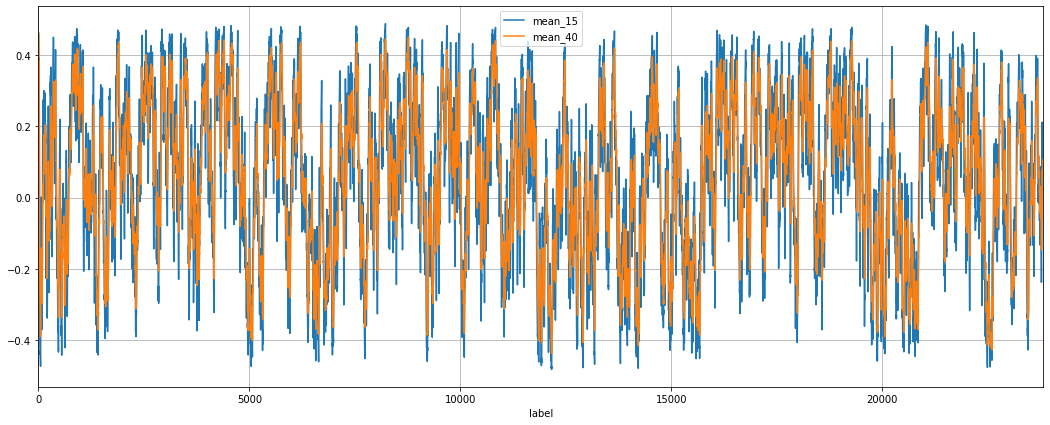

In [38]:
x = pd.DataFrame({'mean_15': forecasts.mean(axis=1).ewm(span=15).mean(),
                  'mean_40': forecasts.mean(axis=1).ewm(span=40).mean()
                  #'forecast': forecasts.mean(axis=1)
                 })
x.plot(figsize=(18,7),grid=True);

In [39]:
forecasts.corr()

,7,15,30,120,240,480
7,1.000000,0.810529,0.626737,0.352744,0.270894,0.199688
15,0.810529,1.000000,0.848299,0.509622,0.388501,0.283665
30,0.626737,0.848299,1.000000,0.673996,0.518557,0.377364
120,0.352744,0.509622,0.673996,1.000000,0.873898,0.681180
240,0.270894,0.388501,0.518557,0.873898,1.000000,0.866993
480,0.199688,0.283665,0.377364,0.681180,0.866993,1.000000


In [40]:
def get_emas(close, periods):
    ind = pd.DataFrame({'close': close})
    ind['ema_fast'] = close.ewm(span=periods[0]).mean()
    ind['ema_slow'] = close.ewm(span=periods[1]).mean()
    ind['diff'] = ind['ema_fast'] - ind['ema_slow']
    return ind

In [41]:
ema_pairs = [(60, 240), (120, 640), (360, 1120)]

In [42]:
emas = pd.DataFrame()
for pair in ema_pairs:
    emas[pair] = get_emas(data.close, pair)['diff']
emas.tail()

,"(60, 240)","(120, 640)","(360, 1120)"
label,,,
23805,15.505255,21.686037,-1.939456
23806,16.029457,22.051769,-1.752673
23807,16.802480,22.559546,-1.525124
23808,17.570041,23.072996,-1.294522
23809,18.153127,23.493953,-1.088350


In [43]:
emas.corr()

,"(60, 240)","(120, 640)","(360, 1120)"
"(60, 240)",1.000000,0.802243,0.420029
"(120, 640)",0.802243,1.000000,0.829923
"(360, 1120)",0.420029,0.829923,1.000000


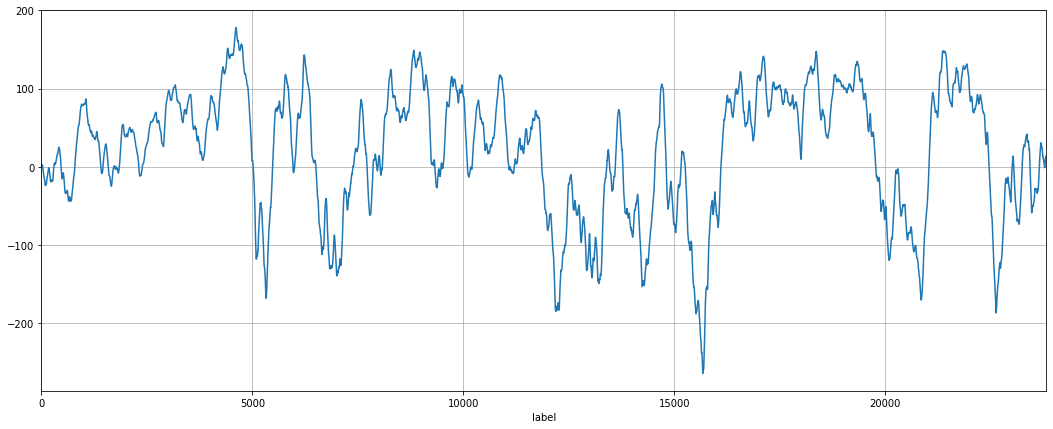

In [44]:
emas.mean(axis=1).plot(figsize=(18,7), grid=True);

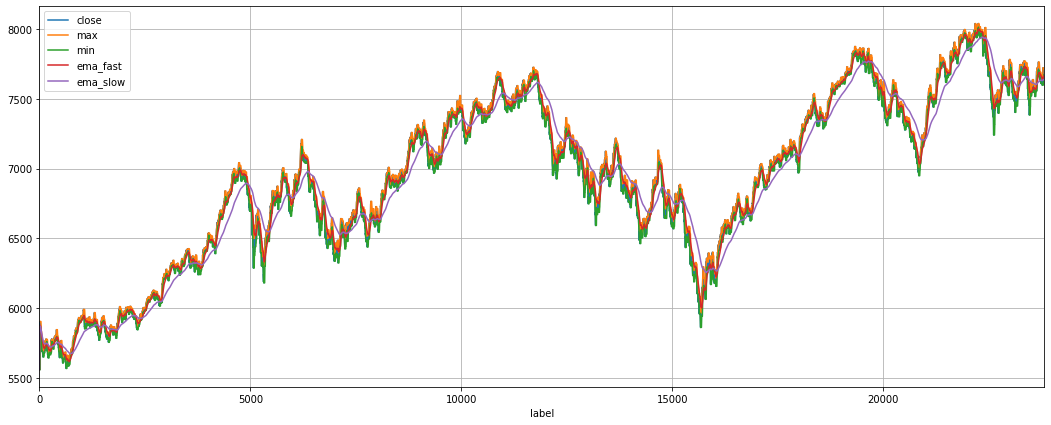

In [45]:
data.plot(figsize=(18,7), grid=True);

In [46]:
10/ emas.mean(axis=1).abs().mean()

0.14373758891705718

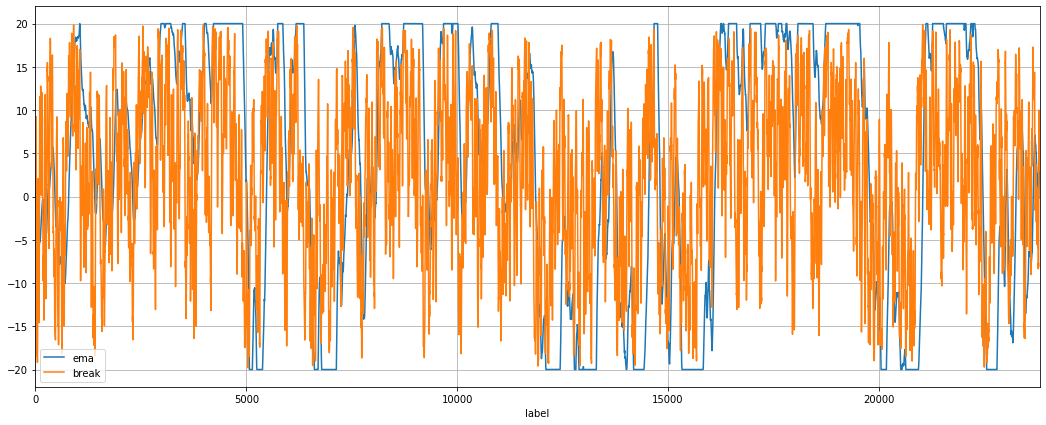

In [47]:
indices = pd.DataFrame({'ema': (emas.mean(axis=1) * .23).clip(lower=-20, upper=20),
                       'break': forecasts.mean(axis=1).rolling(15).mean() * 40
                       })
indices.plot(figsize=(18,7), grid=True);

In [48]:
indices.corr()

,ema,break
ema,1.000000,0.441761
break,0.441761,1.000000


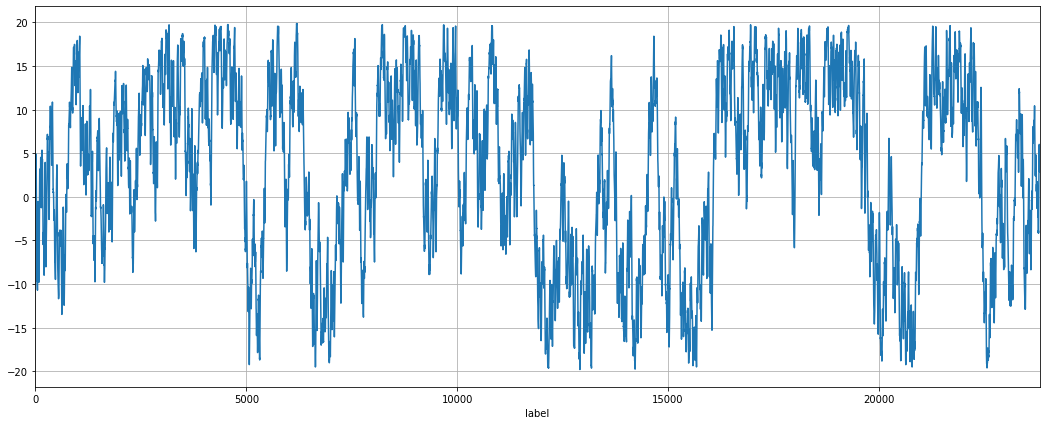

In [49]:
indices.mean(axis=1).plot(figsize=(18,7), grid=True);

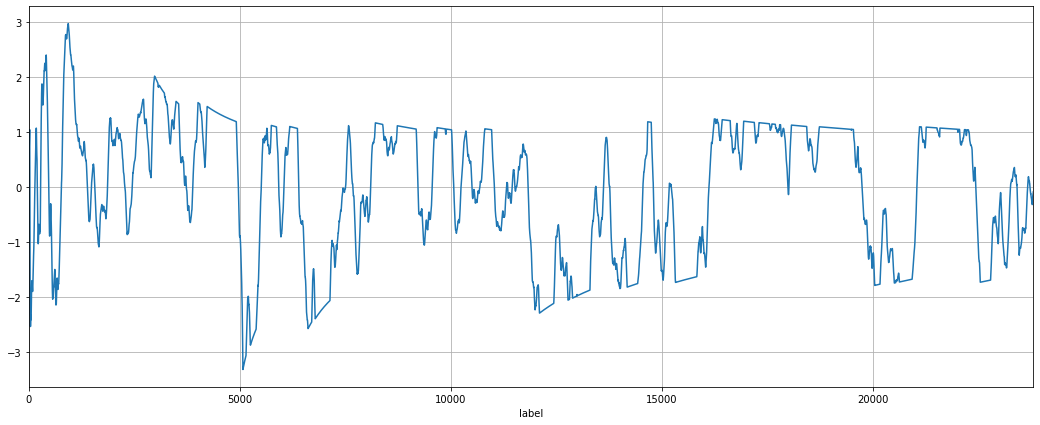

In [50]:
((indices['ema'] - indices['ema'].expanding().mean()) / indices['ema'].expanding().std()).plot(figsize=(18,7), grid=True);

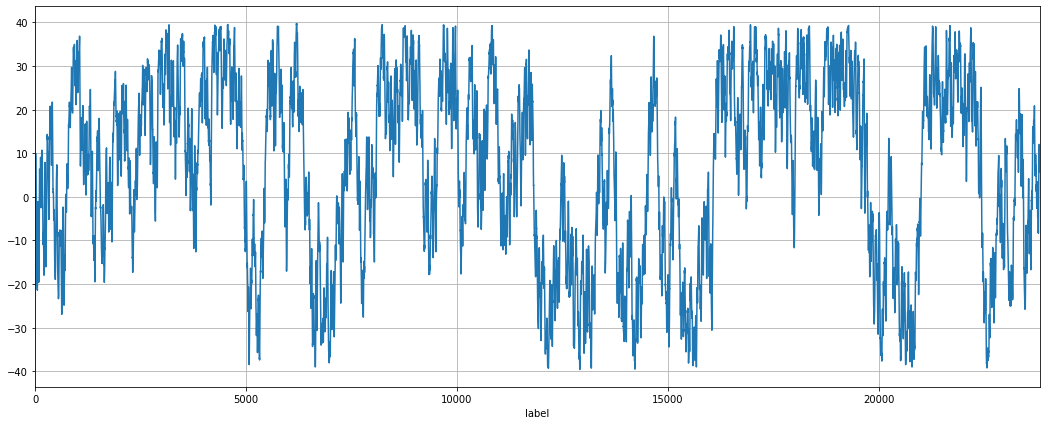

In [51]:
(indices['ema'] + indices['break']).plot(figsize=(18,7), grid=True);

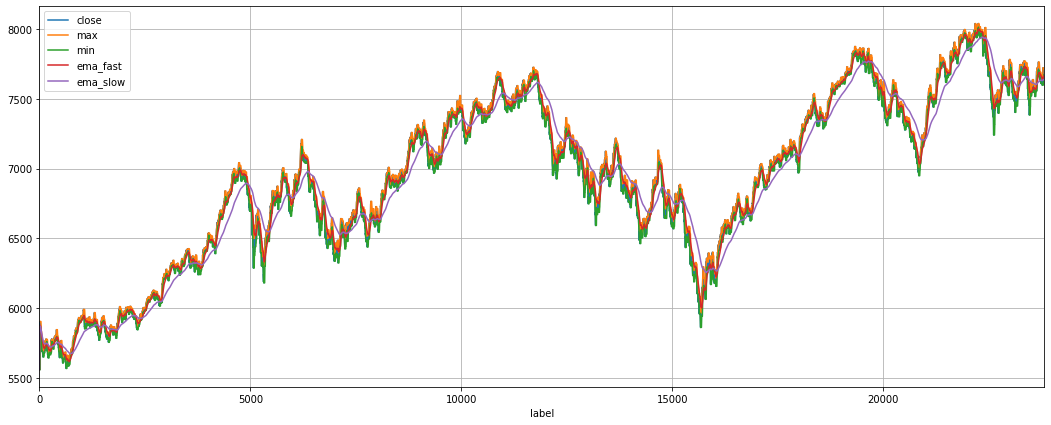

In [52]:
data.plot(figsize=(18,7), grid=True);

In [53]:
def get_ATR(data, periods):
    TR = pd.DataFrame({'A': (data['high'] - data['low']),
                       'B': (data['high'] - data['close']).abs(),
                       'C': (data['low'] - data['close']).abs()
                      })
    TR['TR'] = TR.max(axis=1)
    TR['ATR'] = TR['TR'].rolling(periods).mean()
    return TR.ATR

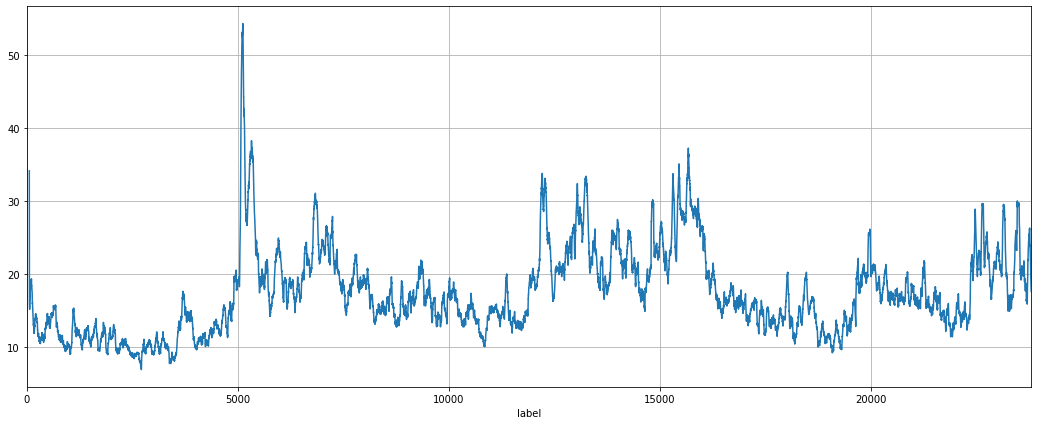

In [54]:
get_ATR(vol_candles, 60).plot(figsize=(18,7), grid=True);

In [55]:
def get_std(data, periods):
    returns = np.log(data.avg_price.pct_change()+1)
    return returns.rolling(periods).std() * data.avg_price

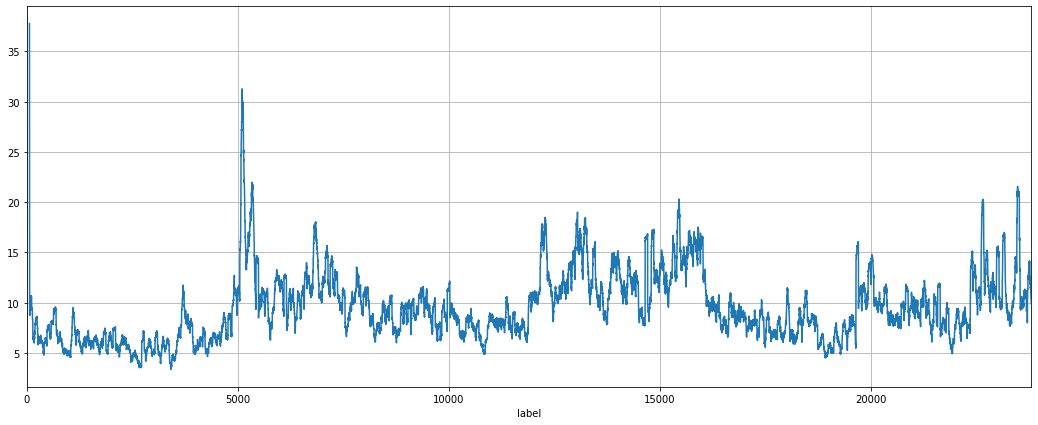

In [56]:
get_std(vol_candles, 60).plot(figsize=(18,7), grid=True);

In [57]:
vol_indicators = pd.DataFrame({'ATR': get_ATR(vol_candles, 80), 
                               'std': get_std(vol_candles, 80)})

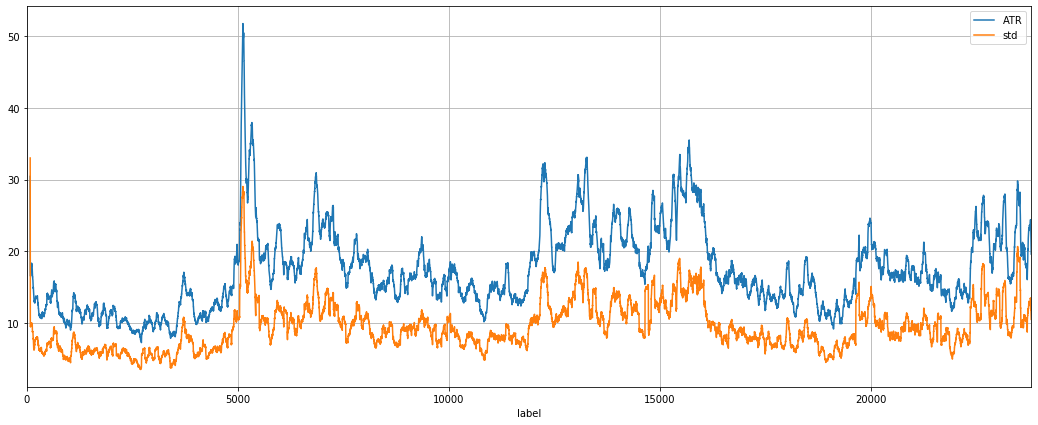

In [58]:
vol_indicators.plot(figsize=(18,7), grid=True);

In [59]:
vol_indicators.corr()

,ATR,std
ATR,1.000000,0.963146
std,0.963146,1.000000


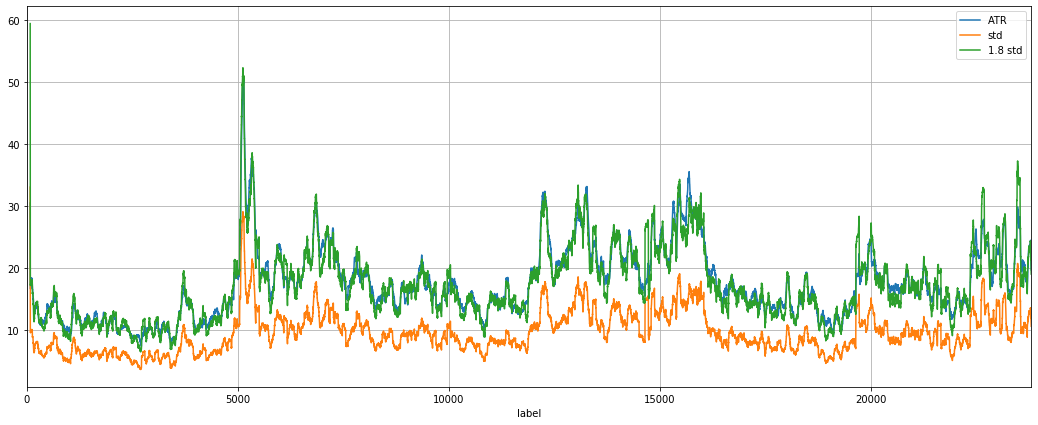

In [60]:
vol_indicators['1.8 std'] = vol_indicators['std'] * 1.8
vol_indicators.plot(figsize=(18,7), grid=True);

In [61]:
vol_indicators.corr()

,ATR,std,1.8 std
ATR,1.000000,0.963146,0.963146
std,0.963146,1.000000,1.000000
1.8 std,0.963146,1.000000,1.000000


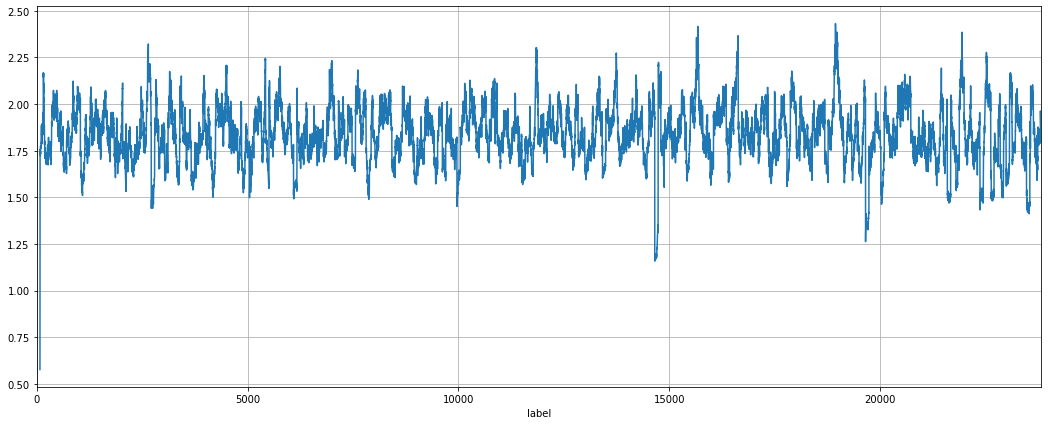

In [62]:
(vol_indicators['ATR'] / vol_indicators['std']).plot(figsize=(18,7), grid=True);

In [63]:
periods = [10, 20, 40, 80, 160]

In [64]:
multi_period = pd.DataFrame({'close': data.close})

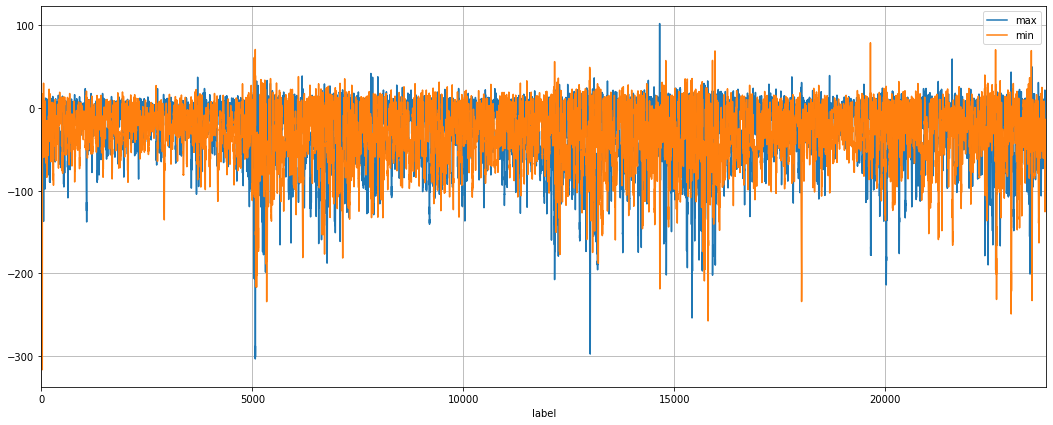

In [65]:
multi_period['max'] = multi_period.close - multi_period.close.shift(1).rolling(20).max()
multi_period['min'] = multi_period.close.shift(1).rolling(20).min() - multi_period.close
multi_period[['max', 'min']].plot(figsize=(18,7), grid=True);

In [66]:
multi_period_max = pd.DataFrame({'close': data.close})
multi_period_min = pd.DataFrame({'close': data.close})
for period in periods:
    multi_period_max[period] = multi_period.close - multi_period.close.shift(1).rolling(period).max()
    multi_period_min[period] = multi_period.close.shift(1).rolling(20).min() - multi_period.close
multi_period_avg = pd.DataFrame({
    #'close': data.close,
    'max': multi_period_max.mean(axis=1).clip(upper=2200, lower=800),
    'min': multi_period_min.mean(axis=1).clip(upper=2200, lower=800),
})
multi_period_avg.tail()

,max,min
label,,
23805,1247.166271,1269.226956
23806,1251.761899,1266.163204
23807,1262.974580,1258.688083
23808,1263.227597,1257.853400
23809,1256.960170,1261.892571


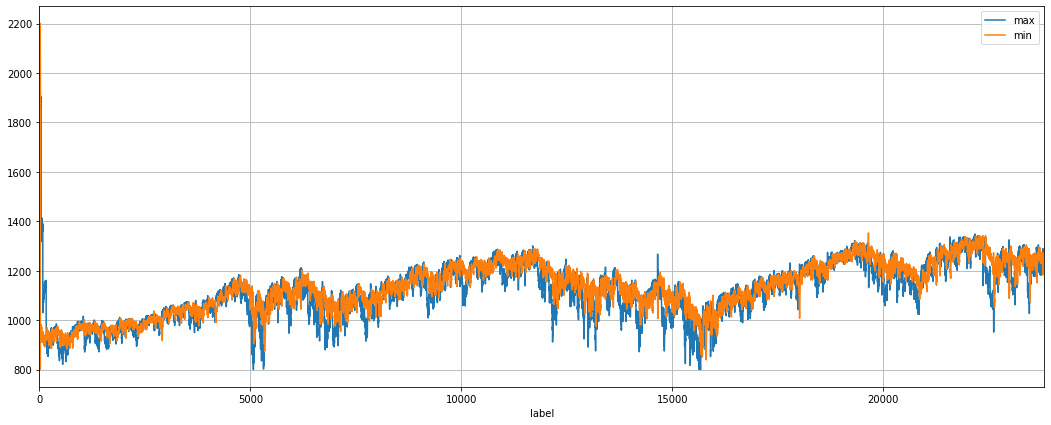

In [67]:
multi_period_avg.plot(figsize=(18,7), grid=True);

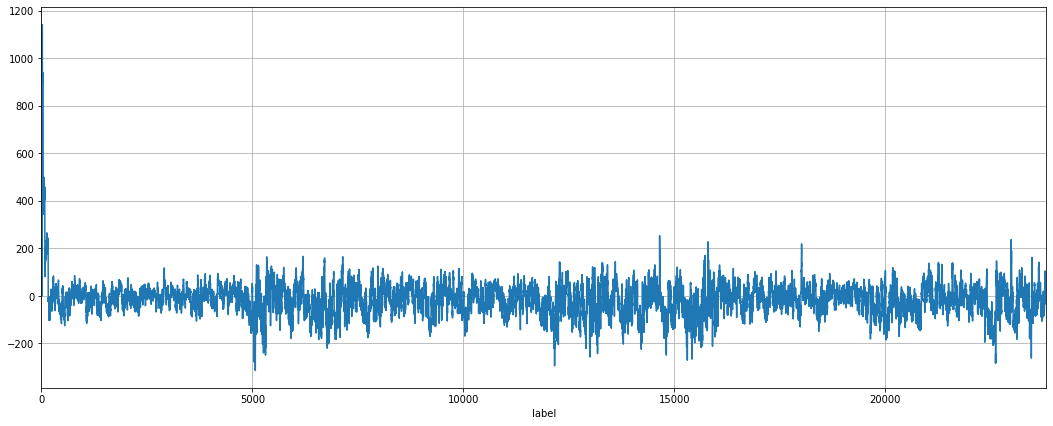

In [68]:
(multi_period_avg['max'] - multi_period_avg['min']).plot(figsize=(18,7), grid=True);

In [69]:
from functools import partial

def get_min_max(data, period):
    return pd.DataFrame({
        'max': (data - data.shift(1).rolling(period).max()) > 0,
        'min': (data.shift(1).rolling(period).min() - data) > 0
    })

def majority_function(data):
    return (0.5 + ((data.sum(axis=1) - 0.5) / data.count(axis=1))).round(0)

def get_min_max_df(data, periods, func=get_min_max):
    min_max_func = partial(func, data)
    mins = pd.DataFrame()
    maxs = pd.DataFrame()
    for period in periods:
        df = min_max_func(period)
        mins[period] = df['min']
        maxs[period] = df['max']
    return {'min': mins,
           'max': maxs}

def get_signals(data, periods, func=get_min_max_df):
    min_max = func(data, periods)
    #return min_max['min']
    
    return pd.DataFrame({
        'signal': majority_function(min_max['max']) - majority_function(min_max['min'])
    })
    

In [70]:
get_signals(data.close, periods).tail()

,signal
label,
23805,0.0
23806,0.0
23807,1.0
23808,1.0
23809,0.0


In [71]:
signals = pd.DataFrame({
    'close': data.close,
    'signal': get_signals(data.close, periods)['signal']
})

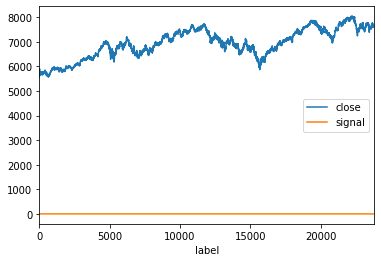

In [72]:
signals.plot();

In [73]:
signals['value'] = signals['close'] * signals['signal']

In [74]:
signals.tail()

,close,signal,value
label,,,
23805,7683.603404,0.0,0.000000
23806,7688.199032,0.0,0.000000
23807,7699.411713,1.0,7699.411713
23808,7700.663738,1.0,7700.663738
23809,7694.604982,0.0,0.000000


In [75]:
signals['value'] = signals.value.map(lambda x: x if x != 0 else np.nan)

In [76]:
signals['buy'] = signals['value'].map(lambda x: x if x > 0 else np.nan)
signals['sell'] = signals['value'].map(lambda x: -x if x < 0 else np.nan)

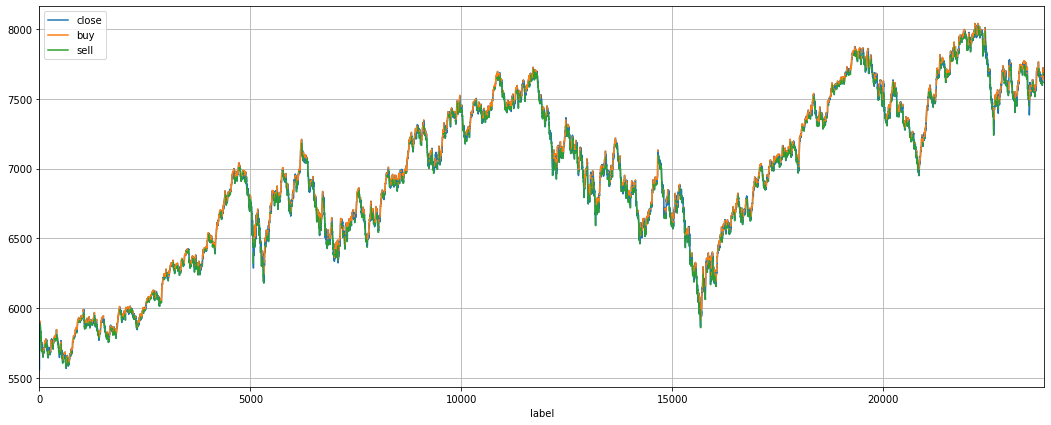

In [77]:
signals[['close', 'buy', 'sell']].plot(figsize=(18, 7), grid=True);

In [78]:
signals['cum_signal'] = signals.signal.expanding().apply(lambda x: x.sum().clip(min=-1, max=1), raw=False)

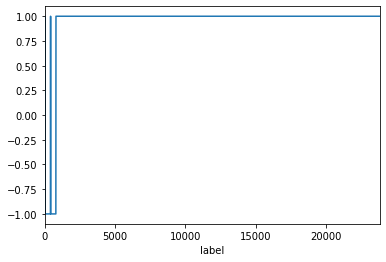

In [79]:
signals['cum_signal'].plot()

In [80]:
#signals['filter'] = np.sign(emas.mean(axis=1))
signals['filter'] = np.sign(data.close - data.ema_fast)
signals['atr'] = get_ATR(vol_candles, 80)

In [81]:
number_of_trades = 0
entry = 0
for row in signals.itertuples():
    if row.Index == 0:
        continue
    # if there's no position signal is to be filtered
    if signals.loc[row.Index-1, 'cum_signal'] == 0 and row.filter * row.signal != 1:
        signals.loc[row.Index, 'cum_signal'] = 0
        continue
    else:
        signals.loc[row.Index, 'cum_signal'] = (signals.loc[row.Index-1, 'cum_signal'] + row.signal).clip(max=1, min=-1)
        
    # create stop loss
    if signals.loc[row.Index, 'cum_signal'] - signals.loc[row.Index-1, 'cum_signal'] != 0:
        sl = signals.loc[row.Index, 'close'] - signals.loc[row.Index, 'cum_signal'] * signals.loc[row.Index, 'atr'] * 1
        signals.loc[row.Index, 'sl'] = sl
    if not signals.loc[row.Index, 'sl']:
        signals.loc[row.Index, 'sl'] = signals.loc[row.Index-1, 'sl']
        
    # apply stop loss
    if signals.loc[row.Index, 'cum_signal'] == 1 and signals.loc[row.Index, 'close'] < sl:
        signals.loc[row.Index, 'cum_signal'] = 0
    elif signals.loc[row.Index, 'cum_signal'] == -1 and signals.loc[row.Index, 'close'] > sl:
        signals.loc[row.Index, 'cum_signal'] = 0
        
    # count trades
    if signals.loc[row.Index, 'cum_signal'] != signals.loc[row.Index-1, 'cum_signal']:
        number_of_trades += 1

In [82]:
signals.tail()

,close,signal,value,buy,sell,cum_signal,filter,atr,sl
label,,,,,,,,,
23805,7683.603404,0.0,NaN,NaN,NaN,0.0,1.0,21.562500,NaN
23806,7688.199032,0.0,NaN,NaN,NaN,0.0,1.0,21.434375,NaN
23807,7699.411713,1.0,7699.411713,7699.411713,NaN,1.0,1.0,20.471875,7678.939838
23808,7700.663738,1.0,7700.663738,7700.663738,NaN,1.0,1.0,19.996875,NaN
23809,7694.604982,0.0,NaN,NaN,NaN,1.0,1.0,19.628125,NaN


In [83]:
signals['value'] = signals['close'] * signals['cum_signal']
signals['value'] = signals.value.map(lambda x: x if x != 0 else np.nan)
signals['long'] = signals['value'].map(lambda x: x if x > 0 else np.nan)
signals['short'] = signals['value'].map(lambda x: -x if x < 0 else np.nan)

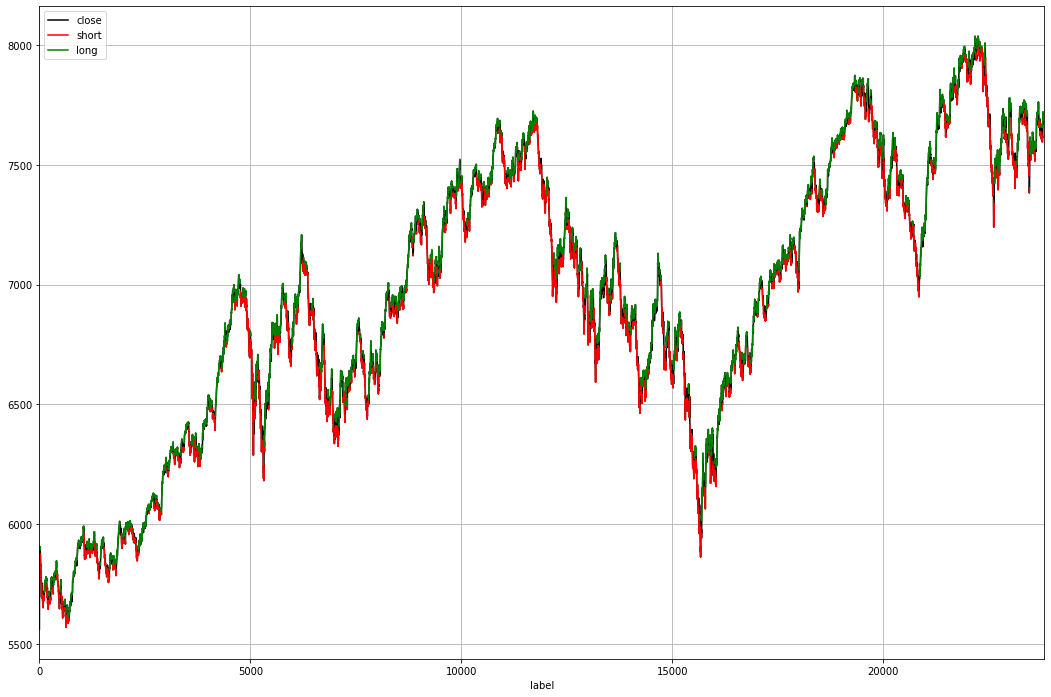

In [84]:
signals[['close', 'short', 'long']].plot(figsize=(18, 12), grid=True, color=['k', 'r', 'g']);

In [85]:
#signals.tail(200)

In [86]:
signals.head()

,close,signal,value,buy,sell,cum_signal,filter,atr,sl,long,short
label,,,,,,,,,,,
0,5562.077476,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,5840.519221,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
2,5878.327783,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
3,5893.820332,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
4,5882.818193,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN


In [87]:
signals['long_pnl'] = signals.long.diff().fillna(0)
signals['short_pnl'] = - signals.short.diff().fillna(0)

In [88]:
long_pnl = signals.long_pnl.sum()
short_pnl = signals.short_pnl.sum()
pnl = long_pnl + short_pnl
long_pnl, short_pnl, pnl

(12530.17800978553, 9916.62535802327, 22446.8033678088)

fast filter: 773 (980 with 60minute volumes)
slow filter: 404

In [89]:
signals['pnl'] = signals['long_pnl'] + signals['short_pnl']
pnl_p = signals[signals['pnl']>0].pnl
pnl_m = signals[signals['pnl']<0].pnl
pnl_p.count(), pnl_m.count(), pnl_p.count()/(pnl_p.count()+pnl_m.count())

(8926, 6947, 0.5623385623385624)

In [90]:
pnl_p.sum(), pnl_m.sum(), pnl_p.sum()/ pnl_m.abs().sum()

(67844.20965406125, -45397.40628625246, 1.494451229796498)

In [91]:
signals['date'] = vol_candles['date']

In [92]:
signals.set_index('date', inplace=True)

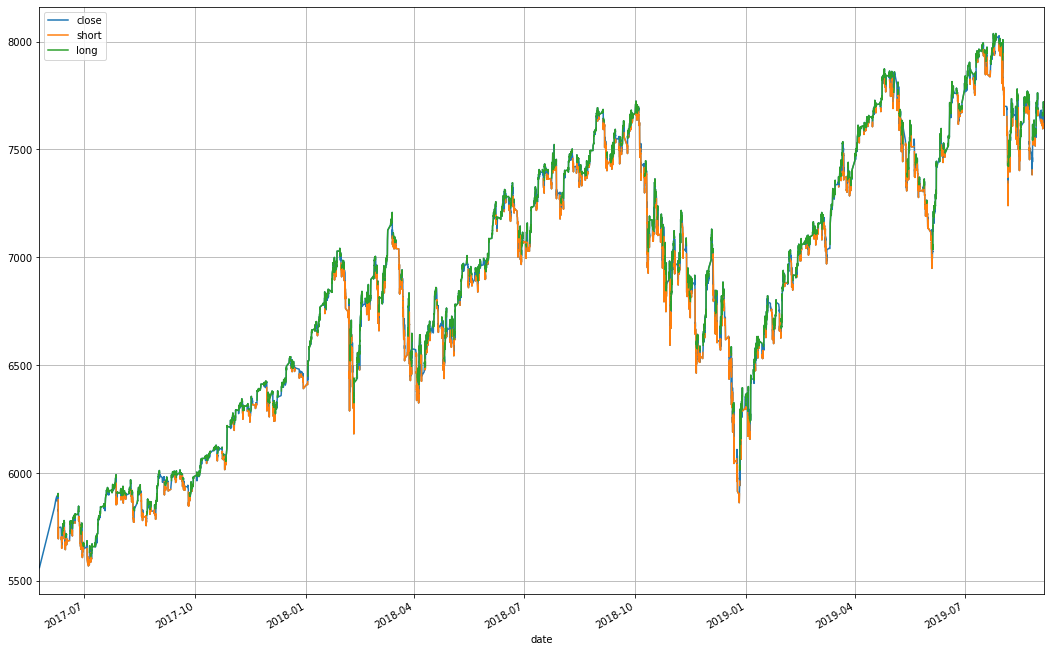

In [93]:
signals[['close', 'short', 'long']].plot(figsize=(18, 12), grid=True);

In [94]:
signals.tail(30)

,close,signal,value,buy,sell,cum_signal,filter,atr,sl,long,short,long_pnl,short_pnl,pnl
date,,,,,,,,,,,,,,
2019-09-04 00:31:00,7614.595646,0.0,-7614.595646,NaN,NaN,-1.0,-1.0,23.240625,NaN,NaN,7614.595646,0.000000,2.233950,2.233950
2019-09-04 02:40:00,7618.264541,0.0,-7618.264541,NaN,NaN,-1.0,-1.0,23.290625,NaN,NaN,7618.264541,0.000000,-3.668895,-3.668895
2019-09-04 03:32:00,7636.702626,1.0,NaN,7636.702626,NaN,0.0,1.0,23.596875,7636.702626,NaN,NaN,0.000000,-0.000000,0.000000
2019-09-04 05:01:00,7656.314006,1.0,7656.314006,7656.314006,NaN,1.0,1.0,23.646875,7632.667131,7656.314006,NaN,0.000000,-0.000000,0.000000
2019-09-04 06:52:00,7661.988866,1.0,7661.988866,7661.988866,NaN,1.0,1.0,23.878125,NaN,7661.988866,NaN,5.674861,-0.000000,5.674861
2019-09-04 08:02:00,7681.505214,1.0,7681.505214,7681.505214,NaN,1.0,1.0,23.834375,NaN,7681.505214,NaN,19.516347,-0.000000,19.516347
2019-09-04 08:29:00,7703.309665,1.0,7703.309665,7703.309665,NaN,1.0,1.0,24.034375,NaN,7703.309665,NaN,21.804452,-0.000000,21.804452
2019-09-04 09:15:00,7705.862447,1.0,7705.862447,7705.862447,NaN,1.0,1.0,24.103125,NaN,7705.862447,NaN,2.552782,-0.000000,2.552782
2019-09-04 09:54:00,7719.410153,1.0,7719.410153,7719.410153,NaN,1.0,1.0,24.137500,NaN,7719.410153,NaN,13.547706,-0.000000,13.547706


In [95]:
interval = pd.Series(signals.index).diff().loc[10:]
interval.tail(20)

23790   00:58:00
23791   00:47:00
23792   01:04:00
23793   01:03:00
23794   00:42:00
23795   00:04:00
23796   00:07:00
23797   00:05:00
23798   00:07:00
23799   00:11:00
23800   00:08:00
23801   00:07:00
23802   00:13:00
23803   00:12:00
23804   00:17:00
23805   00:17:00
23806   00:15:00
23807   00:16:00
23808   00:27:00
23809   00:17:00
Name: date, dtype: timedelta64[ns]

In [96]:
interval.mean()

Timedelta('0 days 00:49:27.342857')

In [97]:
daily = pd.DataFrame()
daily['close'] = signals['close'].resample('D').last()
daily['pnl'] = (signals['long_pnl'] + signals['short_pnl']).resample('D').sum()
daily.tail()

,close,pnl
date,,
2019-08-31,NaN,0.000000
2019-09-01,NaN,0.000000
2019-09-02,7621.773985,-10.581987
2019-09-03,7616.829595,-33.099086
2019-09-04,7694.604982,24.748822


In [98]:
daily['dollars'] = 0
daily.iloc[0,2] = 25000

In [99]:
daily.head()

,close,pnl,dollars
date,,,
2017-05-25,5562.077476,0.0,25000
2017-05-26,NaN,0.0,0
2017-05-27,NaN,0.0,0
2017-05-28,NaN,0.0,0
2017-05-29,NaN,0.0,0


In [100]:
multiplier = 20

In [101]:
daily['dollars'] = 25000 + daily.pnl.cumsum() * multiplier

In [102]:
daily.tail()

,close,pnl,dollars
date,,,
2019-08-31,NaN,0.000000,474314.712373
2019-09-01,NaN,0.000000,474314.712373
2019-09-02,7621.773985,-10.581987,474103.072627
2019-09-03,7616.829595,-33.099086,473441.090915
2019-09-04,7694.604982,24.748822,473936.067356


In [103]:
daily['return'] = daily.dollars.pct_change()

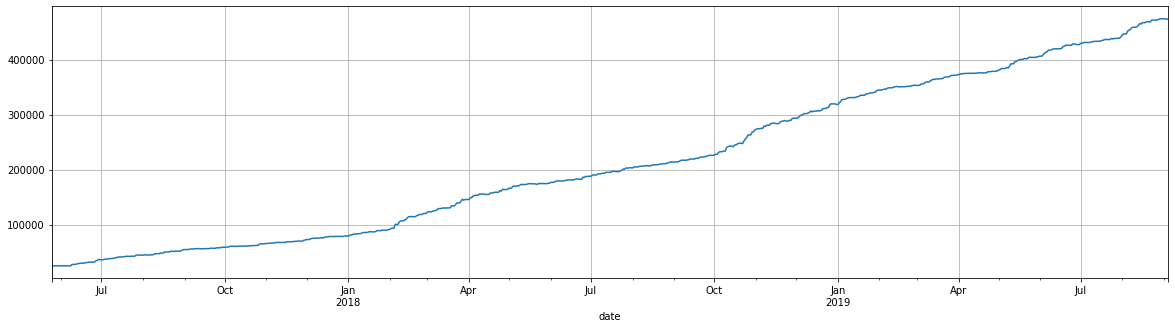

In [104]:
daily.dollars.plot(figsize=(20,5), grid=True);

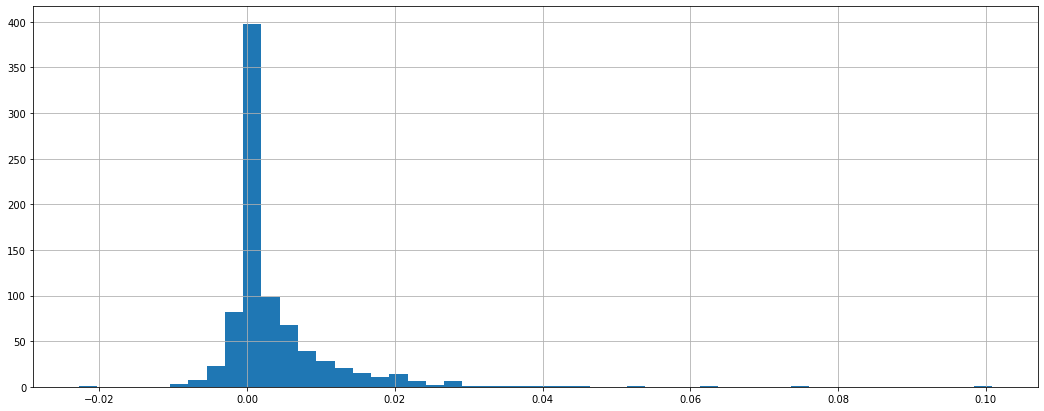

In [105]:
daily['return'].hist(bins=50,figsize=(18,7), grid=True);

In [106]:
daily['dollars_diff'] = daily.dollars.diff()
daily.tail()

,close,pnl,dollars,return,dollars_diff
date,,,,,
2019-08-31,NaN,0.000000,474314.712373,0.000000,0.000000
2019-09-01,NaN,0.000000,474314.712373,0.000000,0.000000
2019-09-02,7621.773985,-10.581987,474103.072627,-0.000446,-211.639746
2019-09-03,7616.829595,-33.099086,473441.090915,-0.001396,-661.981712
2019-09-04,7694.604982,24.748822,473936.067356,0.001045,494.976441


In [107]:
daily['dollars_diff'].sort_values(ascending=True).head(20)

date
2018-12-13   -1846.735166
2018-03-28   -1455.391260
2018-12-18   -1206.409747
2018-12-31   -1161.545202
2019-05-08   -1131.730493
2018-11-23   -1035.299078
2018-04-13   -1002.646946
2018-10-15    -942.830922
2018-04-25    -919.304109
2018-05-02    -912.613201
2018-11-08    -864.201919
2017-06-30    -839.762395
2018-10-22    -787.094830
2019-06-28    -733.776867
2019-08-15    -730.954367
2019-02-28    -707.160819
2019-09-03    -661.981712
2019-07-25    -627.377749
2019-02-15    -625.481462
2019-05-22    -597.136268
Name: dollars_diff, dtype: float64

In [108]:
daily['dollars_diff'].sort_values(ascending=False).head(20)

date
2018-02-05    7063.662680
2018-10-10    6552.967120
2018-12-26    5270.393828
2018-10-23    4963.195599
2018-10-29    4919.326438
2019-08-05    4761.765528
2018-10-26    4749.013537
2018-02-08    4488.160724
2019-05-10    4398.581899
2018-11-07    4283.700724
2019-05-13    4065.344490
2019-01-04    3996.459175
2018-03-19    3835.544925
2018-11-28    3822.024013
2018-06-25    3760.609741
2018-10-24    3750.289631
2019-08-01    3707.471469
2018-03-27    3644.880977
2018-10-04    3570.821508
2018-10-31    3556.491964
Name: dollars_diff, dtype: float64

In [109]:
small = 0
big = []
for i in daily[daily['dollars_diff'] < 0].reset_index().date.diff().eq(pd.Timedelta('1 D')).iteritems():
    if i[1]:
        small += 1
    else:
        if small > 0:
            big.append(small)
            small = 0
print(big)

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


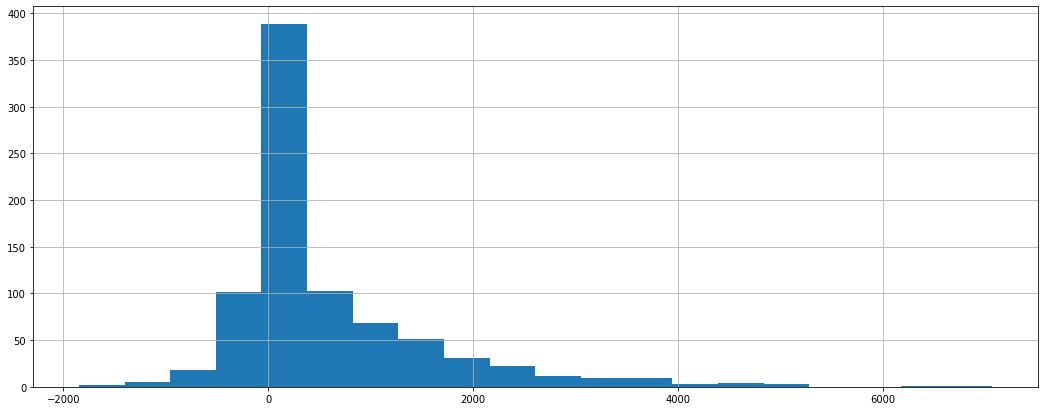

In [110]:
daily['dollars_diff'].hist(bins=20,figsize=(18,7), grid=True);

In [111]:
daily.tail()

,close,pnl,dollars,return,dollars_diff
date,,,,,
2019-08-31,NaN,0.000000,474314.712373,0.000000,0.000000
2019-09-01,NaN,0.000000,474314.712373,0.000000,0.000000
2019-09-02,7621.773985,-10.581987,474103.072627,-0.000446,-211.639746
2019-09-03,7616.829595,-33.099086,473441.090915,-0.001396,-661.981712
2019-09-04,7694.604982,24.748822,473936.067356,0.001045,494.976441


In [112]:
from pyfolio.timeseries import perf_stats

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [113]:
perf_stats(daily['return'])

Annual return           1.435315
Cumulative returns     17.957443
Annual volatility       0.132973
Sharpe ratio            6.778182
Calmar ratio           62.966262
Stability               0.955061
Max drawdown           -0.022795
Omega ratio            10.477514
Sortino ratio          40.044545
Skew                         NaN
Kurtosis                     NaN
Tail ratio              8.244824
Daily value at risk    -0.013176
dtype: float64

In [114]:
(daily['return'] + 1).product()

18.957442694246982

In [115]:
number_of_trades

2351

In [116]:
spread = .25 * multiplier
commission = 1.18 + .85 
cost_of_trades = number_of_trades * (spread + commission)
cost_of_trades

16527.53

In [117]:
days = (daily.index[-1] - daily.index[0]).days #pd.to_datetime('20190613')).days
days

832

In [118]:
trades_per_day = number_of_trades / days
trades_per_day

2.8257211538461537

In [119]:
pnl_in_dollars = pnl*multiplier

In [120]:
cost_of_trades / (pnl_in_dollars)

0.03681488568591087

In [121]:
mean = daily['return'].mean() * 252
std = daily['return'].std() * (252**.5)
mean, std

(0.9013165898189789, 0.132973197185719)

In [122]:
mean/std

6.778182437473784

In [123]:
#daily.to_pickle('cl_return.pickle')